# MEG Pipeline

## Ubuntu/FreeSurfer/MNE环境安装

1. VMware虚拟机安装Ubuntu

    [VMware安装Ubuntu20.04教程](https://zhuanlan.zhihu.com/p/141033713)

    - Ubuntu版本>18.04

2. Ubuntu安装FreeSurfer

    [Ubuntu20.04安装FreeSurfer教程](https://zhuanlan.zhihu.com/p/464008182)

    - License.txt需要手动注册

3. Ubuntu安装Anaconda

    [Ubuntu安装Anaconda教程](https://blog.csdn.net/m0_50117360/article/details/108403586)

4. Anaconda创建MNE环境并安装MNE包

    > `conda create -n mne_env python=3.8`
    - 创建名为`mne_env`的环境，Python版本可通过`python=X.X(3.7、3.8)`控制，官网建议Python版本>=3.7

    > `source activate mne_env`
    - 激活`mne_env`环境

    > `pip install mne` 
    > or
    > `conda install mne`

    - 安装基础mne包。Linux下仅需要用到mne包中的`mne.bem.make_watershed_bem` / `mne.bem.make_flash_bem`函数用于生成bem文件( inner_skull.surf / outer_skin.surf / outer_skull.surf )

    > `source deactivate mne_env`

    - 退出`mne_env`环境

## Freesurfer重建皮质表面

1. 将`mgz, nii, nii.gz`格式文件放入到某目录内，将该目录设定为`SUBJECTS_DIR`，在Ubuntu桌面下打开终端输入

    > `export SUBJECTS_DIR='path to subject directory'` # SUBJECTS_DIR变量为自设定存储数据的目录
    
2. 修改`SUBJECTS_DIR`后，使用`recon-all`生成Freesurfer输出，输出文件保存于`-s`参数后的 `subjects`文件夹

    > recon-all -i sample-001.nii.gz -s subjects -all # 在SUBJECTS_DIR目录下新建一个subjects文件夹存放输出文件

## MNE 生成BEM文件
1. Freesurfer重建完成之后，激活'mne_env'环境

   > `source activate mne_env`
   
2. 在终端输入计算生成BEM文件，耗时较长。`-s`后接subjects文件夹名， `-d`后接SUBJECTS_DIR目录。

    > `mne watershed_bem -s 'subjects' -d 'SUBJECTS_DIR'` 

- **经过上述操作，最后得到Freesurfer输出文件+BEM输出文件**

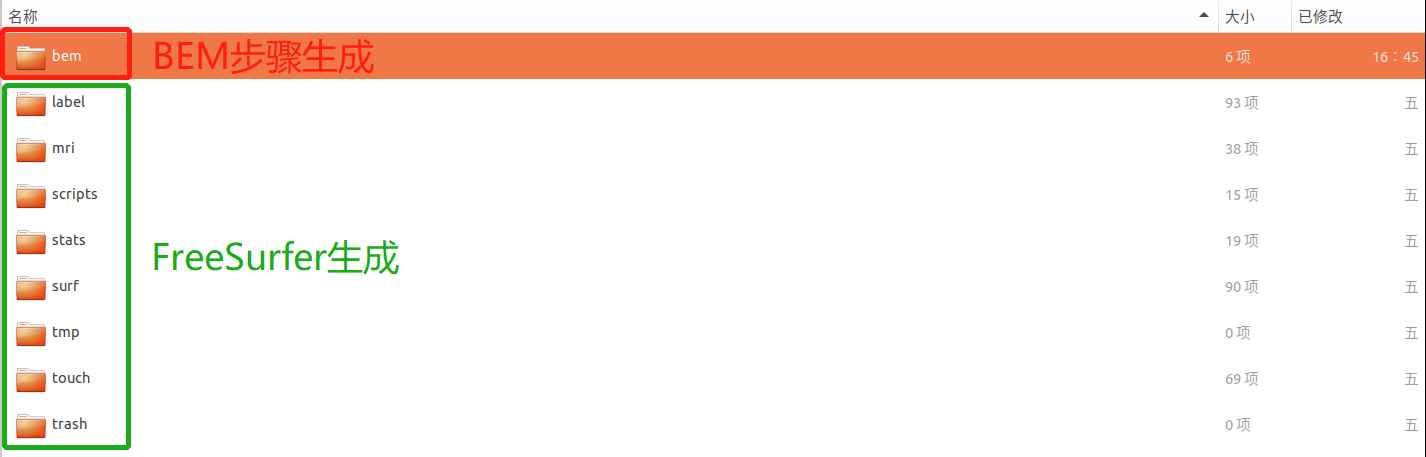

## 代码
### 导入工具包

In [2]:
import os.path as op
import numpy as np
import mne
import os

### MEG 数据存放结构
```
E:\MEGData\sub_002.(data path)
├─MEG (MEG data path)
│  ├─subject_002
│  ├─subject_003
│  └─empty_data
└─subjects_fs (freesurfer+bem data path)
    ├─subject_002 (subjects name)
    │  ├─bem
    │  │  └─watershed
    │  ├─label
    │  ├─mri
    │  │  ├─orig
    │  │  └─transforms
    │  ├─scripts
    │  ├─stats
    │  ├─surf
    │  └─touch
    └─subject_003
```

In [3]:
# meg数据存放位置
# 主文件夹目录
data_path = r'E:\MEGData\sub_002'
subjects = 'subject_002'
empty_data = 'empty_data'
# MEG文件夹目录
meg_data_path = op.join(data_path,'MEG',subjects)
# (freesurfer+bem)文件夹目录
subjects_dir = op.join(data_path,'subjects_fs',)
#empty记录文件夹
empty_data_path = op.join(data_path,'MEG',empty_data)

print('\n', data_path,'\n',meg_data_path, '\n' ,subjects_dir, '\n' ,empty_data_path)


 E:\MEGData\sub_002 
 E:\MEGData\sub_002\MEG\subject_002 
 E:\MEGData\sub_002\subjects_fs 
 E:\MEGData\sub_002\MEG\empty_data


### 读取raw文件/空房间文件

In [4]:
raw_fname = op.join(meg_data_path, 'sub-002_task-FacePerception_run-1_meg.fif')
raw = mne.io.read_raw_fif(raw_fname, preload=True)

empty_fname = op.join(empty_data_path, 'sub-emptyroom_ses-20090409_task-noise_meg.fif')
empty_raw = mne.io.read_raw_fif(empty_fname, preload=True)

print(raw.info)
print(empty_raw.info)

Opening raw data file E:\MEGData\sub_002\MEG\subject_002\sub-002_task-FacePerception_run-1_meg.fif...
    Read a total of 8 projection items:
        mag_ssp_upright.fif : PCA-mags-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v5 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v3 (1 x 306)  idle
    Range : 248600 ... 788699 =    226.000 ...   716.999 secs
Ready.
Reading 0 ... 540099  =      0.000 ...   490.999 secs...
Opening raw data file E:\MEGData\sub_002\MEG\empty_data\sub-emptyroom_ses-20090409_task-noise_meg.fif...
Isotrak not found
    Read a total of 8 projection items:
        mag_ssp_upright.fif : PCA-mags-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v2 (1

In [ ]:
# 设置3D显示模式
mne.viz.set_3d_options(antialias= True,depth_peeling = False ,smooth_shading = True)

### 手动配准生成trans文件

- 生成trans文件保存时以`-trans.fif`结尾，可用于构建后续的正向算子

In [ ]:
mne.gui.coregistration(subject=subjects,subjects_dir = subjects_dir,inst = raw_fname,
                       advanced_rendering= True,scale_by_distance = True)

In [ ]:
trans = 'sub002-trans.fif'

### 生成BEM表面

In [ ]:
plot_bem_kwargs = dict(subject=subjects, subjects_dir=subjects_dir,
                       brain_surfaces='white', orientation='coronal',
                       slices=[50, 100, 150, 200])
mne.viz.plot_bem(**plot_bem_kwargs)

conductivity = (0.3,)  # for single layer
# conductivity = (0.3, 0.006, 0.3)  # for three layers
# ico=None 表明不使用下采样
model = mne.make_bem_model(subject=subjects, ico=None,
                           conductivity=conductivity,
                           subjects_dir=subjects_dir)

bem = mne.make_bem_solution(model)
# mne.make_bem_model参数选择
#体积源空间/表面源都有

### 生成体积源空间

In [ ]:
surface = op.join(subjects_dir, subjects, 'bem', 'inner_skull.surf')
bem = bem
vol_src = mne.setup_volume_source_space(subjects, 
                                        subjects_dir=subjects_dir,
                                        surface = surface,
                                        add_interpolator=False)  # Just for speed!

print(vol_src)

mne.viz.plot_bem(src=vol_src, **plot_bem_kwargs)

fig = mne.viz.plot_alignment(subject=subjects, subjects_dir=subjects_dir,
                             surfaces='white', coord_frame='mri',
                             src=vol_src)

### 生成前向算子

In [ ]:
fwd = mne.make_forward_solution(raw_fname, trans=trans, src=vol_src, bem=bem,
                                meg=True, eeg=False, mindist=0, n_jobs=1,verbose=True)

print(fwd)

In [ ]:
name = 'sub002-fwd.fif'
mne.write_forward_solution(name,fwd,overwrite = True)

### sss+maxwell滤波

In [5]:
from mne.preprocessing import find_bad_channels_maxwell,maxwell_filter,ICA

In [6]:
auto_noisy_chs, auto_flat_chs, auto_scores = find_bad_channels_maxwell(raw.copy(), 
                                                                       return_scores=True, 
                                                                       verbose=True)
print(auto_noisy_chs) 
print(auto_flat_chs) 

bads = raw.info['bads'] + auto_noisy_chs + auto_flat_chs
raw.info['bads'] = bads

raw_sss = maxwell_filter(raw.copy(),st_only = True, st_duration= 20,  verbose=True)
empty_raw_sss = maxwell_filter(empty_raw.copy(),st_only = True, st_duration= 20,coord_frame="meg", verbose=True)

Applying low-pass filter with 40.0 Hz cutoff frequency ...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 363 samples (0.330 sec)

Scanning for bad channels in 98 intervals (5.0 sec) ...
102 of 102 magnetometer types replaced with T3.
    No bad MEG channels
    Processing 204 gradiometers and 102 magnetometers
    Automatic origin fit: head of radius 80.2 mm
    Using origin 3.1, 32.2, 1.6 mm in the head frame


C:\Users\dell\AppData\Local\Temp\ipykernel_4520\3517043208.py:1: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  auto_noisy_chs, auto_flat_chs, auto_scores = find_bad_channels_maxwell(raw.copy(),


        Interval   1:    0.000 -    4.999
        Interval   2:    5.000 -    9.999
        Interval   3:   10.000 -   14.999
        Interval   4:   15.000 -   19.999
        Interval   5:   20.000 -   24.999
        Interval   6:   25.000 -   29.999
        Interval   7:   30.000 -   34.999
        Interval   8:   35.000 -   39.999
        Interval   9:   40.000 -   44.999
        Interval  10:   45.000 -   49.999
        Interval  11:   50.000 -   54.999
        Interval  12:   55.000 -   59.999
        Interval  13:   60.000 -   64.999
        Interval  14:   65.000 -   69.999
        Interval  15:   70.000 -   74.999
        Interval  16:   75.000 -   79.999
        Interval  17:   80.000 -   84.999
        Interval  18:   85.000 -   89.999
        Interval  19:   90.000 -   94.999
        Interval  20:   95.000 -   99.999
        Interval  21:  100.000 -  104.999
        Interval  22:  105.000 -  109.999
        Interval  23:  110.000 -  114.999
        Interval  24:  115.000 -  

C:\Users\dell\AppData\Local\Temp\ipykernel_4520\3517043208.py:10: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  raw_sss = maxwell_filter(raw.copy(),st_only = True, st_duration= 20,  verbose=True)


        Using 74/95 harmonic components for    0.000  (59/80 in, 15/15 out)
    Using loaded raw data
    Spatiotemporal window did not fit evenly intocontiguous data segment. 11.00 seconds were lumped into the previous window.
    Processing 24 data chunks
        Projecting  3 intersecting tSSS components for    0.000 -   19.999 sec  (#1/24)
        Projecting 12 intersecting tSSS components for   20.000 -   39.999 sec  (#2/24)
        Projecting 12 intersecting tSSS components for   40.000 -   59.999 sec  (#3/24)
        Projecting 11 intersecting tSSS components for   60.000 -   79.999 sec  (#4/24)
        Projecting 13 intersecting tSSS components for   80.000 -   99.999 sec  (#5/24)
        Projecting 12 intersecting tSSS components for  100.000 -  119.999 sec  (#6/24)
        Projecting 12 intersecting tSSS components for  120.000 -  139.999 sec  (#7/24)
        Projecting 12 intersecting tSSS components for  140.000 -  159.999 sec  (#8/24)
        Projecting 11 intersecting tSS

### Raw 降采样+滤波

In [9]:
raw_sss.resample(200)
raw_sss.filter(0.01,40)
print(raw_sss.info)

259 events found
Event IDs: [   5    6    7   13   14   15   17   18   19  256  261  262  263  269
  270  271  273  274  275 4096 4101 4102 4103 4109 4110 4111 4113 4114
 4115 4352]
259 events found
Event IDs: [   5    6    7   13   14   15   17   18   19  256  261  262  263  269
  270  271  273  274  275 4096 4101 4102 4103 4109 4110 4111 4113 4114
 4115 4352]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 66001 samples (330.005 sec)

<Info | 25 non-empty values
 acq_pars: ACQch001 110113 ACQch002 11

### Raw ICA

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 661 samples (3.305 sec)

Fitting ICA to data using 380 channels (please be patient, this may take a while)
Selecting by number: 60 components
Fitting ICA took 39.0s.
Creating RawArray with float64 data, n_channels=60, n_times=98200
    Range : 45200 ... 143399 =    226.000 ...   716.995 secs
Ready.
Using qt as 2D backend.
Opening ica-browser...


C:\Users\dell\AppData\Local\Temp\ipykernel_4520\419729839.py:6: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  ica_raw.plot_components()


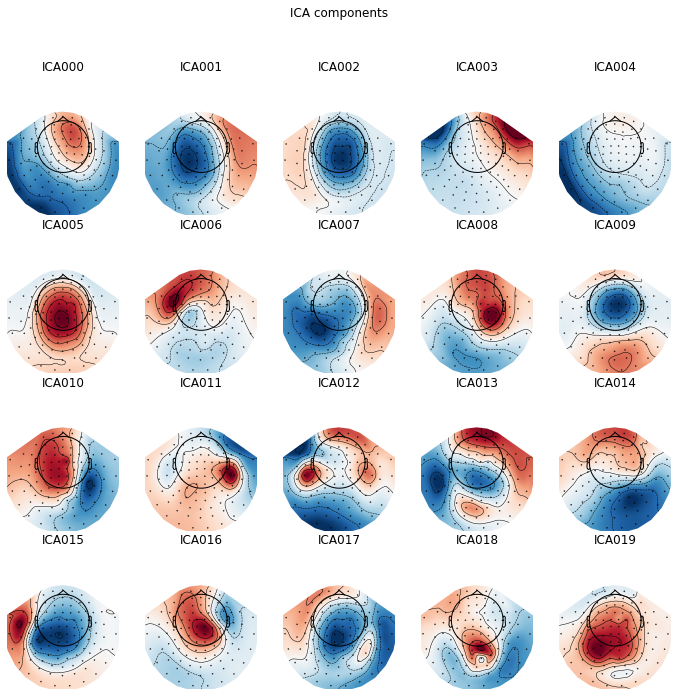

C:\Users\dell\AppData\Local\Temp\ipykernel_4520\419729839.py:6: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  ica_raw.plot_components()


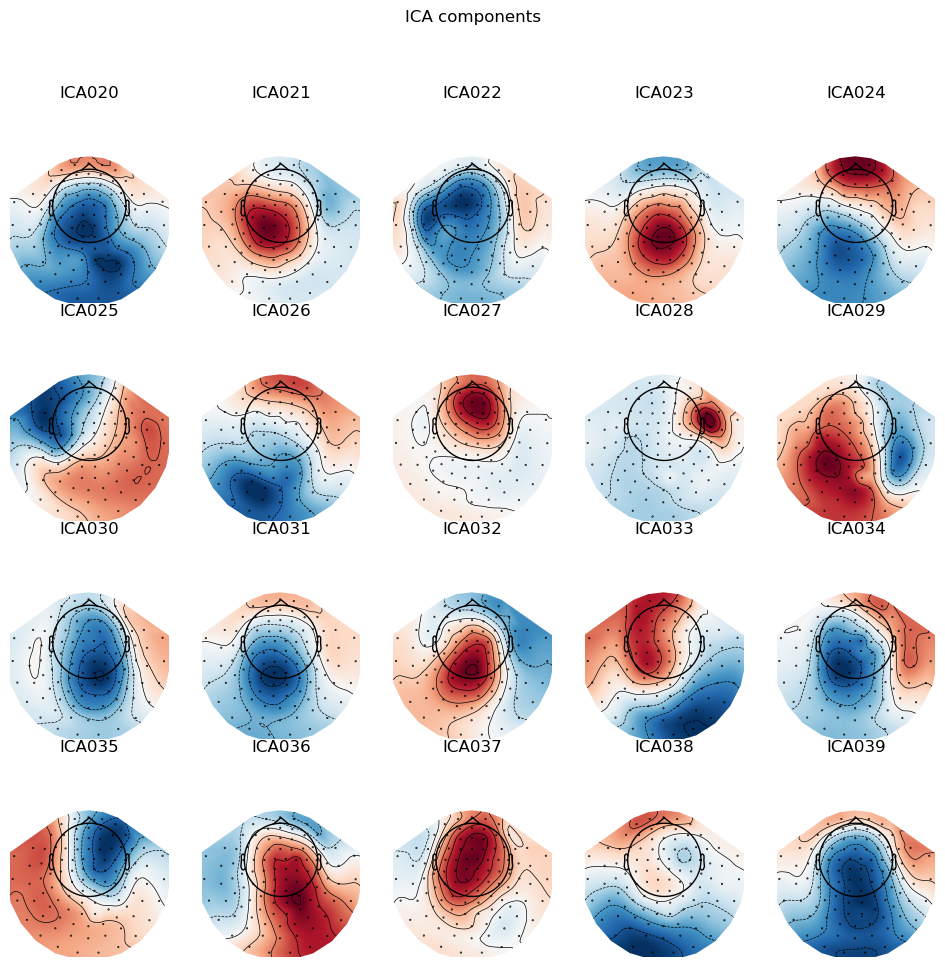

C:\Users\dell\AppData\Local\Temp\ipykernel_4520\419729839.py:6: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  ica_raw.plot_components()


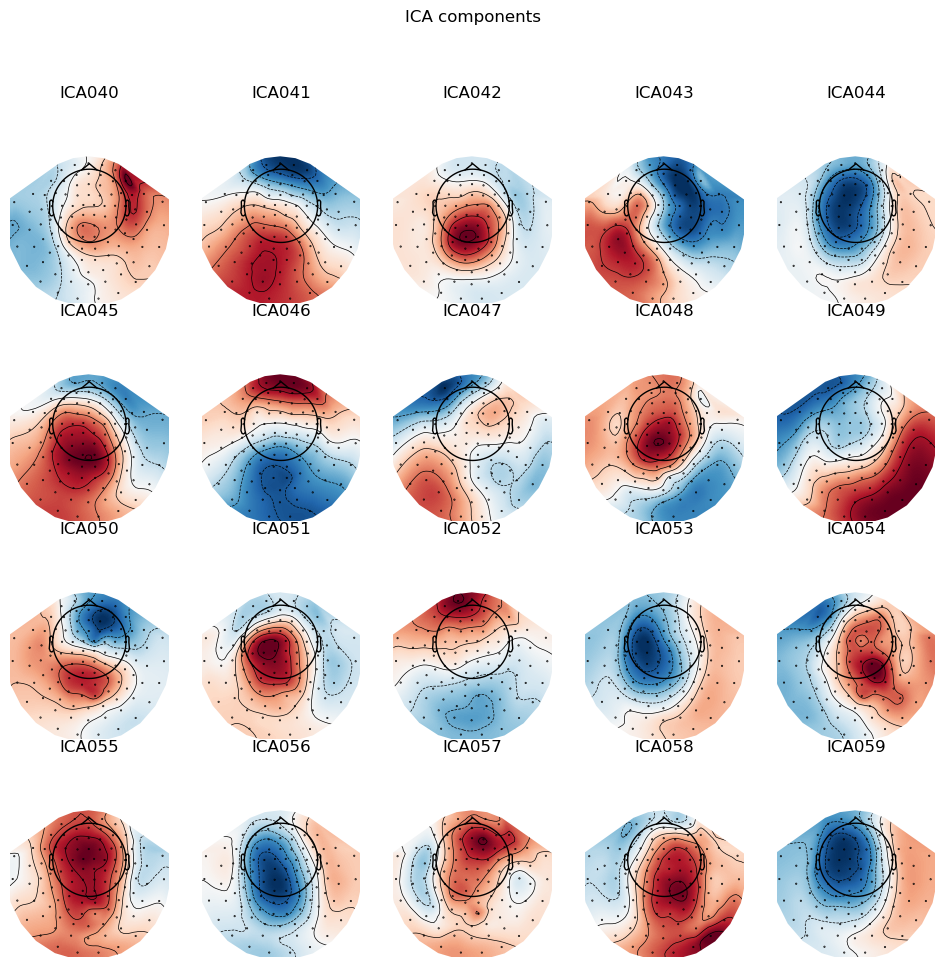

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
245 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\dell\AppData\Local\Temp\ipykernel_4520\419729839.py:9: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  ica_raw.plot_properties(filt_raw, picks=ica_raw.exclude)


Not setting metadata
245 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\dell\AppData\Local\Temp\ipykernel_4520\419729839.py:9: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  ica_raw.plot_properties(filt_raw, picks=ica_raw.exclude)


Not setting metadata
245 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\dell\AppData\Local\Temp\ipykernel_4520\419729839.py:9: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  ica_raw.plot_properties(filt_raw, picks=ica_raw.exclude)


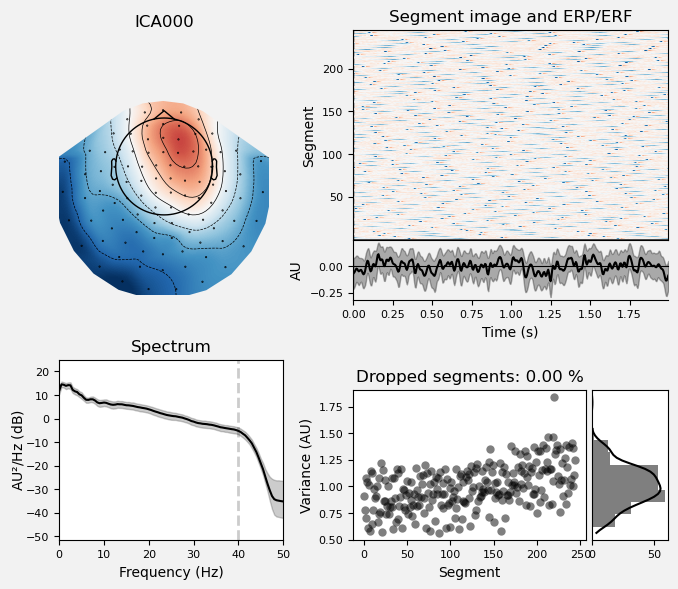

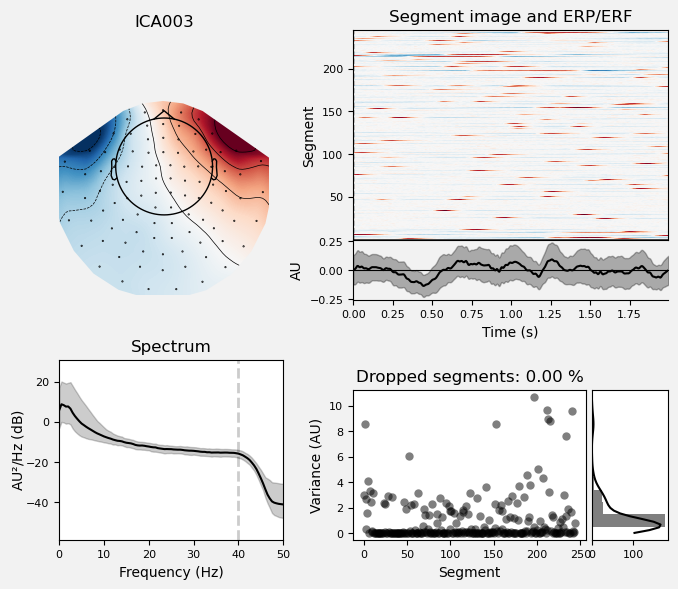

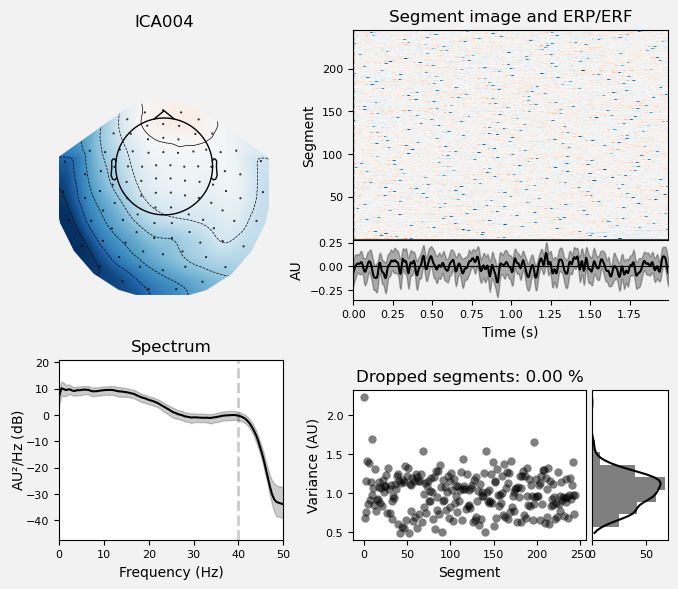

Applying ICA to Raw instance
    Transforming to ICA space (60 components)
    Zeroing out 3 ICA components
    Projecting back using 380 PCA components


<Raw | sub-002_task-FacePerception_run-1_meg.fif, 395 x 98200 (491.0 s), ~303.0 MB, data loaded>

In [12]:
raw_for_ica = raw_sss.copy()
ica_raw = ICA(n_components=60, random_state=1, max_iter=1000)
filt_raw = raw_for_ica.filter(l_freq=1., h_freq=None)
ica_raw.fit(filt_raw)
ica_raw.plot_sources(filt_raw, show_scrollbars=False)
ica_raw.plot_components()

ica_raw.exclude = [0,3,4]  
ica_raw.plot_properties(filt_raw, picks=ica_raw.exclude)
ica_raw.apply(raw_for_ica)

### Empty降采样+滤波

In [ ]:
empty_raw_sss.resample(200)
empty_raw_sss.filter(0.01,40)
print(empty_raw_sss.info)

In [13]:
events = mne.find_events(raw_sss)
event_id = {'famous_face': 5, 'unfamiliar_face': 13, 'scrambled_face': 17}

epochs_face = mne.Epochs(raw_sss, events, tmin=-0.3, tmax=1, baseline = (-0.3,0),
                         event_id=event_id,preload=True)
print(epochs_face.info)

259 events found
Event IDs: [   5    6    7   13   14   15   17   18   19  256  261  262  263  269
  270  271  273  274  275 4096 4101 4102 4103 4109 4110 4111 4113 4114
 4115 4352]
Not setting metadata
75 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 8)
8 projection items activated
Using data from preloaded Raw for 75 events and 261 original time points ...
0 bad epochs dropped
<Info | 25 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...
 chs: 204 Gradiometers, 102 Magnetometers, 74 EEG, 3 Stimulus, 12 misc
 custom_ref_applied: False
 description: (meg) Vectorview system at Cambridge
 dev_head_t: MEG device -> head transform
 dig: 137 items (3 Cardinal, 5 HPI, 75 EEG, 54 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 hpi_meas: 1 item (list)
 hpi

### 计算空房间记录计算噪声协方差

In [ ]:
famousface_evoked = epochs_face['famous_face'].average()
unfamiliarface_evoked = epochs_face['unfamiliar_face'].average()
scrambledface_evoked = epochs_face['scrambled_face'].average()

famousface_noise_cov = mne.compute_raw_covariance(empty_raw_sss,method = 'auto')

### 生成逆算子

In [ ]:
from mne.minimum_norm import make_inverse_operator, apply_inverse_raw,apply_inverse_epochs
inverse_operator = make_inverse_operator(empty_raw_sss.info, fwd, 
                                         famousface_noise_cov, 
                                         loose='auto', depth=0.8)

In [ ]:
method = "dSPM"
snr = 3.
lambda2 = 1. / snr ** 2
'''
stc, residual = apply_inverse_raw(raw_sss.crop(0,20), inverse_operator, lambda2,method=method, 
                                  pick_ori=None,verbose=True)
'''

stc= apply_inverse_epochs(epochs_face['famous_face'], inverse_operator, lambda2,method=method, 
                                  pick_ori=None,verbose=True)
print(stc.type)

In [ ]:
# Retrieve patterns after inversing the z-score normalization step:
patterns = get_coef(time_decod, 'patterns_', inverse_transform=True)

stc = stcs[0]  # for convenience, lookup parameters from first stc
vertices = [stc.lh_vertno, np.array([], int)]  # empty array for right hemi
stc_feat = mne.SourceEstimate(np.abs(patterns), vertices=vertices,
                              tmin=stc.tmin, tstep=stc.tstep, subject='sample')

brain = stc_feat.plot(views=['lat'], transparent=True,
                      initial_time=0.1, time_unit='s',
                      subjects_dir=subjects_dir)